# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam, SGD

# Load Data

In [2]:
con_df = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
con_df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [4]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
con_df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
con_df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'flyash',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine', 'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'},inplace=True)

In [7]:
con_df.head()

,cement,slag,flyash,water,superplasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<AxesSubplot:>

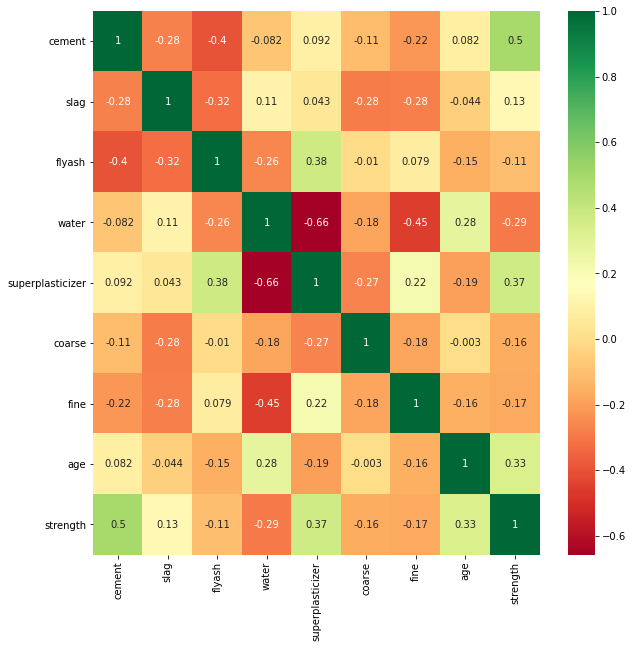

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(con_df.corr(),annot=True,cmap="RdYlGn")

In [9]:
con_df.corr()["strength"].sort_values(ascending=False)

strength            1.000000
cement              0.497832
superplasticizer    0.366079
age                 0.328873
slag                0.134829
flyash             -0.105755
coarse             -0.164935
fine               -0.167241
water              -0.289633
Name: strength, dtype: float64

# Split Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = (con_df.loc[:, con_df.columns != 'strength'])
y = (con_df.loc[:, con_df.columns == 'strength'])

In [12]:
# Split to 50% Train and 50% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

# Split 50% Test into further 30% Test and 20% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.40, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(515, 8)
(309, 8)
(206, 8)


In [14]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(515, 1)
(309, 1)
(206, 1)


# Scale Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [17]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.fit_transform(x_test)
x_val_s = min_max_scaler.fit_transform(x_val)

y_train_s = min_max_scaler.fit_transform(y_train)
y_test_s = min_max_scaler.fit_transform(y_test)
y_val_s = min_max_scaler.fit_transform(y_val)

In [18]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

print(y_train_s.shape)
print(y_test_s.shape)
print(y_val_s.shape)

(515, 8)
(309, 8)
(206, 8)
(515, 1)
(309, 1)
(206, 1)


# Build Model

In [56]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 10, activation='relu', input_dim=8))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='relu'))

In [57]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [58]:
hist = model.fit(
    x_train_s, y_train_s, epochs = 100,
    validation_data = (x_val_s, y_val_s)
)

Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 0.2086 - mae: 0.4012 - val_loss: 0.1799 - val_mae: 0.3589
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1495 - mae: 0.3229 - val_loss: 0.1151 - val_mae: 0.2759
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0891 - mae: 0.2421 - val_loss: 0.0689 - val_mae: 0.2085
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0533 - mae: 0.1825 - val_loss: 0.0514 - val_mae: 0.1847
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0414 - mae: 0.1632 - val_loss: 0.0489 - val_mae: 0.1813
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0451 - mae: 0.1725 - val_loss: 0.0465 - val_mae: 0.1763
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0413 - mae: 0.1643 - val_loss: 0.0447 - val_mae: 0.1723
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0398 - 

17/17 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0785 - val_loss: 0.0150 - val_mae: 0.0939
Epoch 64/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0107 - mae: 0.0813 - val_loss: 0.0145 - val_mae: 0.0915
Epoch 65/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0089 - mae: 0.0732 - val_loss: 0.0144 - val_mae: 0.0918
Epoch 66/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0101 - mae: 0.0783 - val_loss: 0.0144 - val_mae: 0.0917
Epoch 67/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0088 - mae: 0.0723 - val_loss: 0.0145 - val_mae: 0.0923
Epoch 68/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0095 - mae: 0.0775 - val_loss: 0.0145 - val_mae: 0.0920
Epoch 69/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0090 - mae: 0.0738 - val_loss: 0.0141 - val_mae: 0.0907
Epoch 70/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0101 - mae: 0

# Check Model Loss and Error

In [59]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

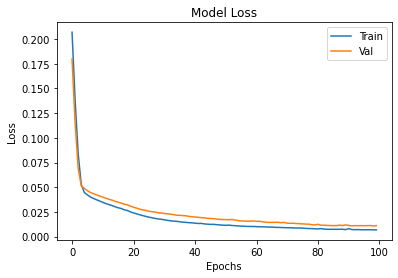

In [60]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

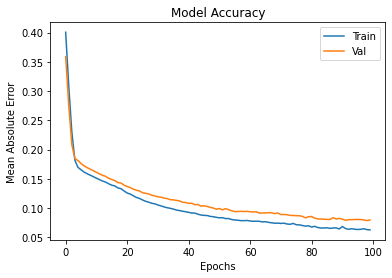

In [61]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Plot Data to See Variations in Predictions

In [62]:
predictions = model.predict(x_test_s)
predictions = min_max_scaler.inverse_transform(predictions)

In [63]:
print(len(predictions))
print(len(x_test_s))

309
309


In [64]:
y_train['Type'] = 'Train'

<ipython-input-64-0bb17de31fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Type'] = 'Train'


In [65]:
y_test['Type'] = 'Test'

In [66]:
pred = pd.DataFrame(data = predictions,index = y_test.index, columns=['Predcited Strength'])

In [67]:
plot = pd.DataFrame()
plot = pd.concat([y_train,y_test])
plot = plot.merge(pred,how='left',left_index=True, right_index=True)

In [68]:
plot

,strength,Type,Predcited Strength
417,12.18,Train,NaN
89,39.30,Train,NaN
958,49.77,Train,NaN
901,29.87,Train,NaN
633,14.20,Train,NaN
...,...,...,...
682,24.05,Test,26.709187
464,56.81,Test,56.202614
259,13.33,Test,15.121294
638,38.21,Test,33.731365


In [69]:
plot_s = plot.reset_index()

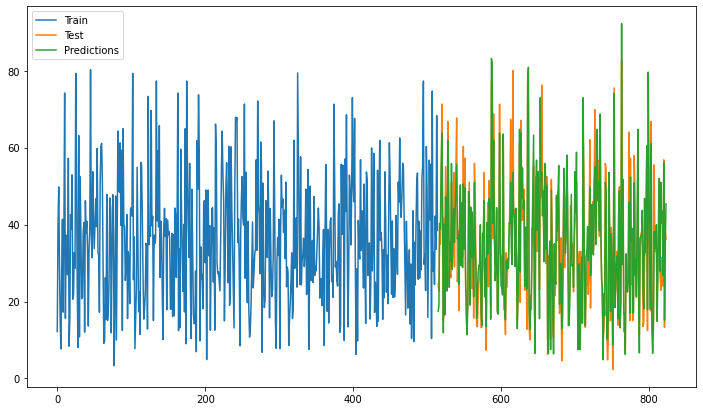

In [70]:
plt.figure(figsize=(12,7))
plt.plot(plot_s[plot_s.Type == 'Train']['strength'],label='Train')
plt.plot(plot_s[plot_s.Type == 'Test']['strength'],label='Test')
plt.plot(plot_s['Predcited Strength'],label='Predictions')
plt.legend()
plt.show()